Face Generator with GAN Kaggle
https://www.kaggle.com/code/ashishjangra27/face-generation-with-gan

Github for Pretrained Models
https://github.com/AshishJangra27/Face-Generator-with-GAN


In [1]:
!git clone https://github.com/AshishJangra27/Face-Generator-with-GAN

Cloning into 'Face-Generator-with-GAN'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 34 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 160.27 MiB | 16.42 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (10/10), done.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

generator = tf.keras.models.load_model('/content/Face-Generator-with-GAN/generator_100.h5', compile=False)

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

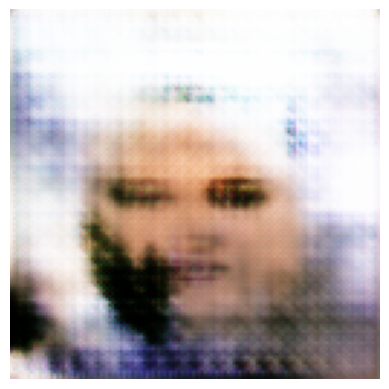

In [3]:
noise = tf.random.normal([1, 100])
# noise += .5

with tf.device('/CPU:0'):
    generated_images = generator(noise, training=False)

generated_images = (generated_images + 1) / 2.0

plt.imshow(generated_images[0])
plt.axis('off')

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import imageio

noise = tf.random.normal([1, 100])

frames = []  # list to store images for GIF

for i in range(1, 8):
    file_path = f'/content/Face-Generator-with-GAN/generator_{i}00.h5'
    print(file_path)

    generator = tf.keras.models.load_model(file_path, compile=False)

    with tf.device('/CPU:0'):
        generated_images = generator(noise, training=False)

    # Rescale from [-1, 1] to [0, 1]
    img = (generated_images[0] + 1) / 2.0
    img = img.numpy()

    # Convert to uint8 for GIF
    img = (img * 255).astype(np.uint8)

    frames.append(img)

# Save GIF
gif_path = '/content/gan_progression.gif'
imageio.mimsave(gif_path, frames, fps=1)

print(f"GIF saved at: {gif_path}")

/content/Face-Generator-with-GAN/generator_100.h5
/content/Face-Generator-with-GAN/generator_200.h5
/content/Face-Generator-with-GAN/generator_300.h5
/content/Face-Generator-with-GAN/generator_400.h5
/content/Face-Generator-with-GAN/generator_500.h5
/content/Face-Generator-with-GAN/generator_600.h5
/content/Face-Generator-with-GAN/generator_700.h5
GIF saved at: /content/gan_progression.gif


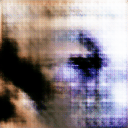

In [5]:
from IPython.display import Image, display

display(Image(filename='/content/gan_progression.gif'))


In [6]:
noise = tf.random.normal([1, 5])

for i in np.linspace(-2, 2, 10):
  print(i)



-2.0
-1.5555555555555556
-1.1111111111111112
-0.6666666666666667
-0.22222222222222232
0.22222222222222232
0.6666666666666665
1.1111111111111107
1.5555555555555554
2.0


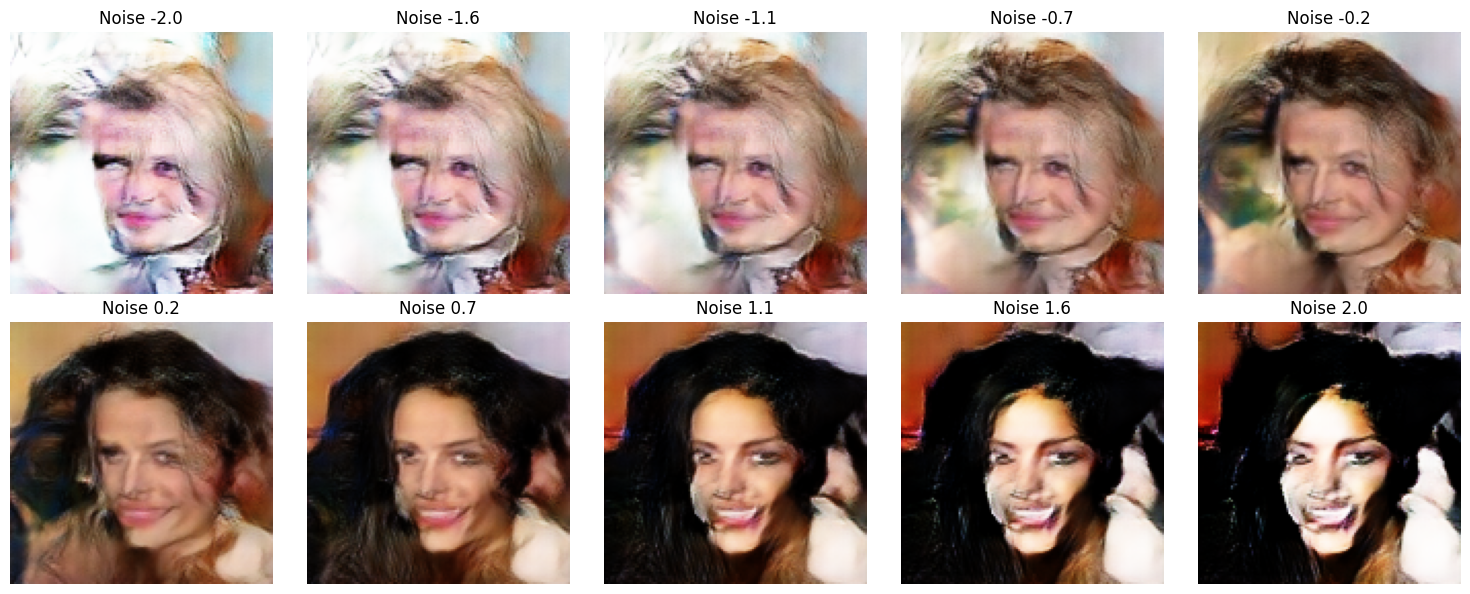

In [7]:
def generate_variations(model, noise_dim=100, num_variations=10):

    base_noise = tf.random.normal([1, noise_dim])

    noise_modifications = np.linspace(-2, 2, num_variations)

    fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns

    for i, noise_offset in enumerate(noise_modifications):
        variation_noise = base_noise + noise_offset

        with tf.device('/CPU:0'):
            generated_image = model(variation_noise, training=False)

        generated_image = (generated_image + 1) / 2.0

        ax = axes[i // 5, i % 5]
        ax.imshow(generated_image[0])
        ax.axis('off')
        ax.set_title(f"Noise {noise_offset:.1f}")

    plt.tight_layout()
    plt.show()

# Generate and display variations
generate_variations(generator)

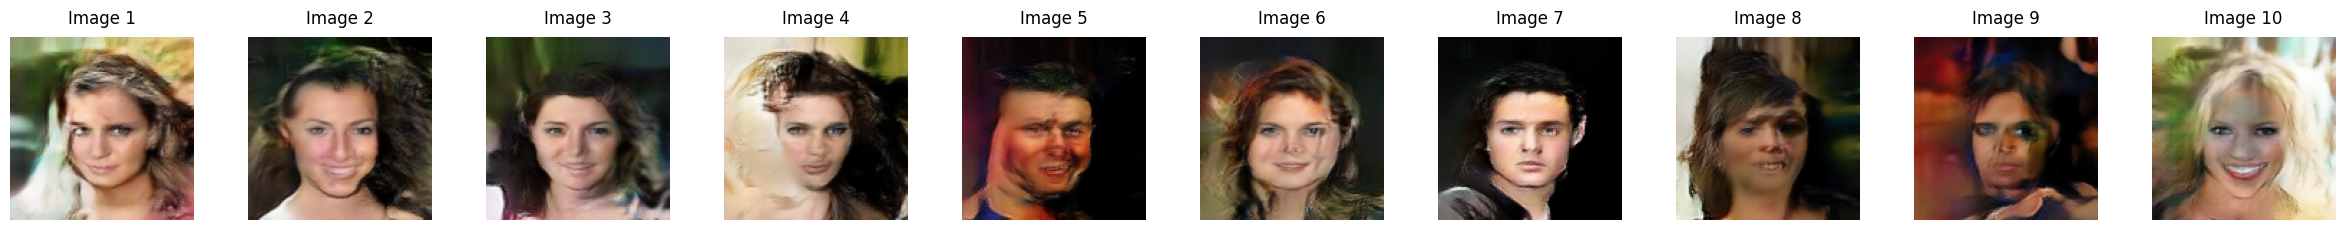

In [8]:
def generate_images_grid(model, noise_dim=100, num_images=10):

    fig, axes = plt.subplots(1, num_images, figsize=(30, 5))  # Wider figure

    for i in range(num_images):
        noise = tf.random.normal([1, noise_dim])

        with tf.device('/CPU:0'):
            generated_image = model(noise, training=False)
        generated_image = (generated_image + 1) / 2.0

        axes[i].imshow(generated_image[0])
        axes[i].axis('off')
        axes[i].set_title(f"Image {i+1}", fontsize=12, pad=10)

    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Generate and display 10 images in a spaced 1x10 layout
generate_images_grid(generator)


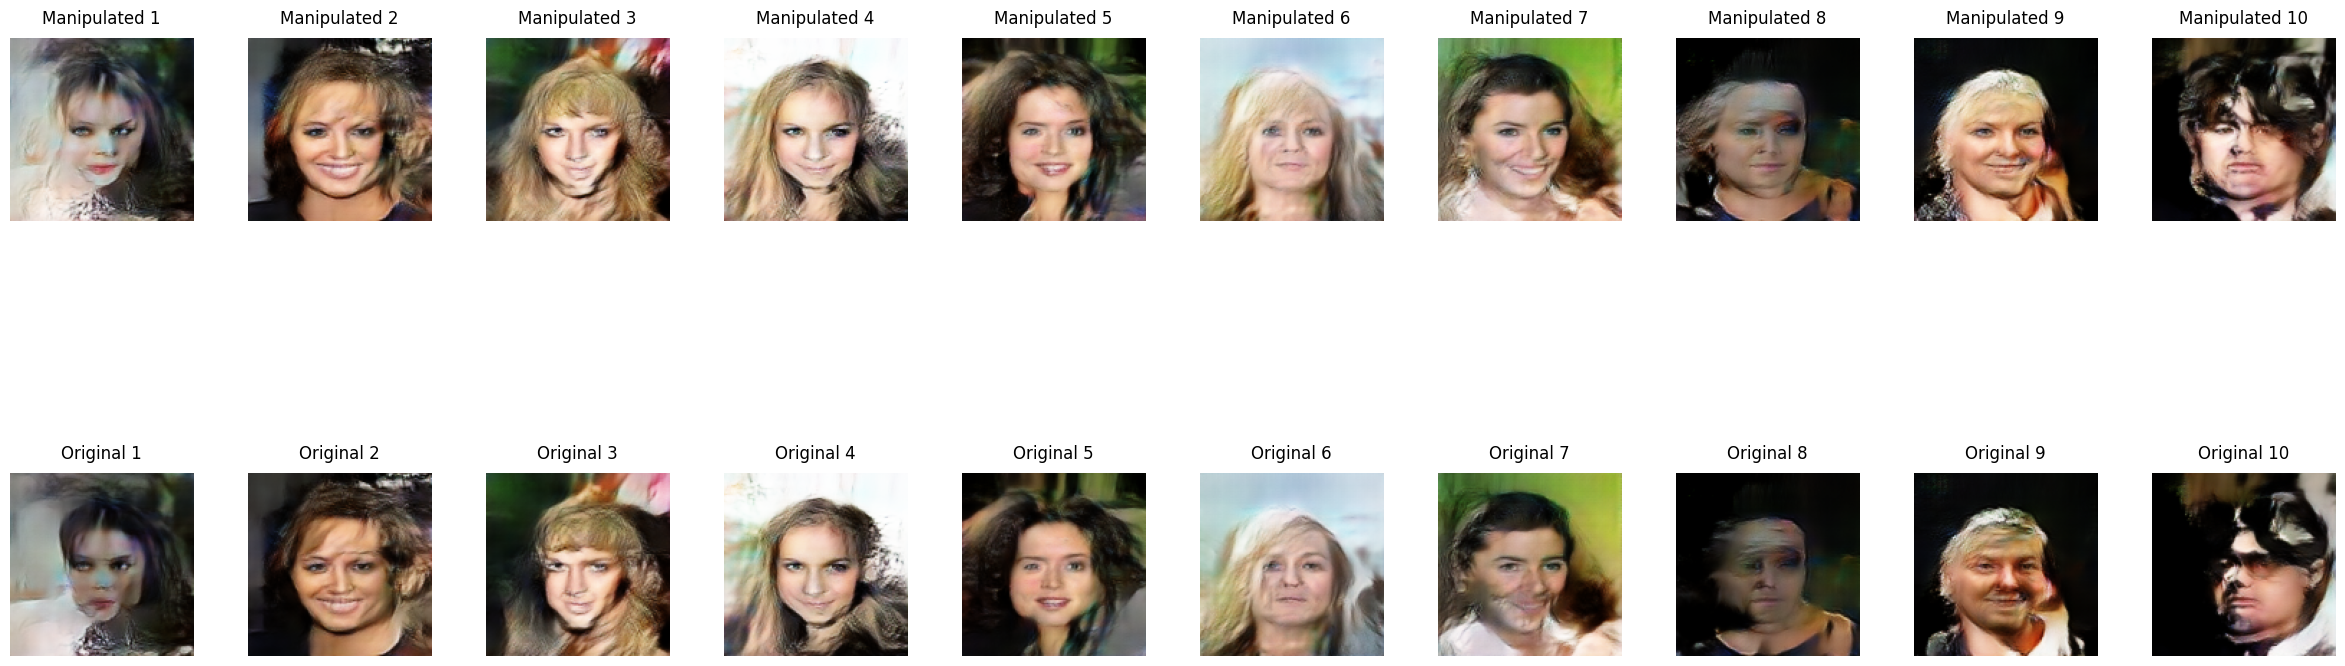

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Force CPU execution
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Function to generate images with and without added noise
def generate_images_with_manipulated_noise(model, noise_dim=100, num_images=10):
    # Generate base random noise vectors
    base_noise = tf.random.normal([num_images, noise_dim])

    # Generate a random noise vector to add to all base noise vectors
    added_noise = tf.random.normal([1, noise_dim]) * 0.5  # Scaling factor for subtle manipulation

    fig, axes = plt.subplots(2, num_images, figsize=(30, 10))  # 2 rows, num_images columns

    for i in range(num_images):
        noise = base_noise[i:i+1]  # Extract a single noise vector
        manipulated_noise = noise + added_noise  # Add the same noise to all vectors

        # Generate original image
        with tf.device('/CPU:0'):
            original_image = model(noise, training=False)
            manipulated_image = model(manipulated_noise, training=False)

        # Rescale images from [-1,1] to [0,1]
        original_image = (original_image + 1) / 2.0
        manipulated_image = (manipulated_image + 1) / 2.0

        # Display manipulated image (Top row)
        axes[0, i].imshow(manipulated_image[0])
        axes[0, i].axis('off')
        axes[0, i].set_title(f"Manipulated {i+1}", fontsize=12, pad=10)

        # Display original image (Bottom row)
        axes[1, i].imshow(original_image[0])
        axes[1, i].axis('off')
        axes[1, i].set_title(f"Original {i+1}", fontsize=12, pad=10)

    # Adjust spacing
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

# Generate and display manipulated vs. original images
generate_images_with_manipulated_noise(generator)


In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Force CPU execution
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Function to generate 6x10 variations of the same base image with nonlinear noise changes
def generate_nonlinear_variations(model, noise_dim=100, rows=6, cols=10):
    base_noise = tf.random.normal([1, noise_dim])  # Base noise

    # Create nonlinear variations of noise
    noise_modifications = np.linspace(-2, 2, rows * cols) * .35 # Base values
    sinusoidal_variations = np.sin(noise_modifications) * .35  # Sinusoidal variation
    exponential_variations = (np.exp(noise_modifications / 2) - 1) * 0.35  # Exponential variation
    combined_variations = noise_modifications + sinusoidal_variations + exponential_variations  # Mix variations

    fig, axes = plt.subplots(rows, cols, figsize=(30, 18))  # 6 rows, 10 columns

    for i, noise_offset in enumerate(combined_variations):
        variation_noise = base_noise + (noise_offset * tf.random.normal([1, noise_dim]))  # Apply variation in different directions

        with tf.device('/CPU:0'):
            generated_image = model(variation_noise, training=False)

        generated_image = (generated_image + 1) / 2.0  # Rescale for visualization

        ax = axes[i // cols, i % cols]
        ax.imshow(generated_image[0])
        ax.axis('off')
        ax.set_title(f"Variation {i+1}", fontsize=10)

    plt.tight_layout()
    plt.show()

# Generate and display nonlinear variations
generate_nonlinear_variations(generator)

Output hidden; open in https://colab.research.google.com to view.

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

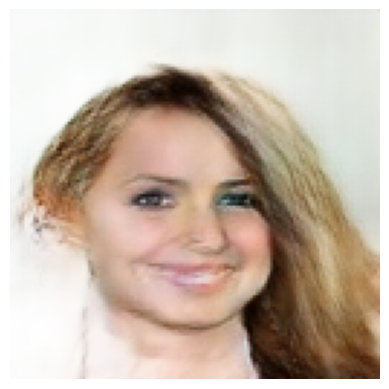

In [11]:
noise = tf.random.normal([1, 100])

with tf.device('/CPU:0'):
    generated_images = generator(noise, training=False)

generated_images = (generated_images + 1) / 2.0

plt.imshow(generated_images[0])
plt.axis('off')